# CoinMarketCap: Exploratory Data Analysis



### Import and instantiate CoinMarketcap
This object represents the data found at https://coinmarketcap.com.

In [1]:
from Scrapers.Coinmarketcap import coinmarketcap
import pandas as pd

In [2]:
cmk = coinmarketcap.CoinMarketcap()

### Get coin obects.
Coins are ranked by marketcap. The first one is probably bitcoin from https://coinmarketcap.com/currencies/bitcoin.

In [3]:
coins = cmk.coins()
coin_data = [coin.json() for coin in coins]
coin_data = pd.DataFrame(coin_data)
coin_data.head()

,marketcap,name,price,symbol,timestamp,url,volume
0,189536000000,Bitcoin,11231.80,BTC,None,http://coinmarketcap.com/currencies/bitcoin/,9926540000
1,92206500000,Ethereum,943.57,ETH,None,http://coinmarketcap.com/currencies/ethereum/,2545260000
2,44648100000,Ripple,1.14,XRP,None,http://coinmarketcap.com/currencies/ripple/,806673000
3,26199800000,Bitcoin Cash,1543.27,BCH,None,http://coinmarketcap.com/currencies/bitcoin-cash/,820947000
4,12335100000,Litecoin,223.09,LTC,None,http://coinmarketcap.com/currencies/litecoin/,1739670000


### Plot a pie chart of coins by marketcap

In [71]:
num_coins = 5
data = sorted(list(zip([int(x) for x in coin_data['marketcap'].values], coin_data['name'].values)), reverse=True)
other = sum(d[0] for d in data[num_coins:])
data = data[:num_coins] + [(other, 'other')]
[sizes, labels] = zip(*data)

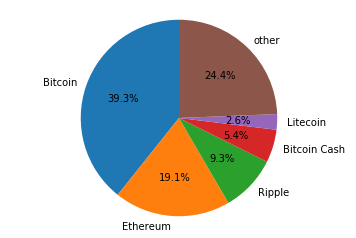

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Plot a Barchart of Coins by Marketcap

### Get GitHub Page for Bitcoin

In [9]:
bitcoin = coins[0]
github = bitcoin.github()
pinned_repos = github.pinned_repos()
btc_repo = pinned_repos[0]

#### Plot a coins GitHub Stars by Price

#### Explore cmk Usage

In [ ]:
coin_data = cmk.all_coin_data()

In [ ]:
#features (TODO):
#    timestamp
#    github_stars

coin_data.head()


In [ ]:
coins = cmk.coins()

In [ ]:
bitcoin = coins[0]

In [ ]:
bitcoin

In [ ]:
bitcoin = cmk.coin(bitcoin)

In [ ]:
bitcoin

In [ ]:
bitcoin.get_history()

In [ ]:
cmk.coin_names()